# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd # importar librerías

In [44]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [45]:
plans.head(5) # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [46]:
users.head(5) # mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [47]:
usage.head(5) # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [48]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [49]:
plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [50]:
users.info() # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [51]:
usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [52]:
# cantidad de nulos para users
print(users.isnull().sum()) # Cantidad de valores nulos
print(users.isnull().mean()) # Proporción de valores nulos

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [53]:
# cantidad de nulos para usage
print(usage.isnull().sum())
print(usage.isnull().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?

    **dataset users** = La columna **city** tiene 11.7% de nulos y la columna **churn_date** tiene 88.3% de nulos.
  
    **dataset usage** = La columna **date** tiene 0.125% de nulos, la columna **duration** tiene 55.1% de nulos y la columna **length** tiene 44.7% de nulos.
  
- Indica qué harías: ¿imputar, eliminar, ignorar? 

**dataset users** 
    - Calidad general buena. 
    - Nulos esperados en **churn_date**. 
    - **city** con nulos moderados, imputación opcional. 
    - **Acción**: ignorar o imputar city; mantener churn_date tal cual. 

**dataset usage** 
    - Problemas graves en **duration** y **length**. 
    - No imputar sin entender el origen. 
    - **date** puede limpiarse sin impacto. 
    - **Acción**: investigar por tipo de evento; decidir si los nulos son válidos o errores. 

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [54]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` 

• 	Los valores van de 10000 a 13999, lo cual indica que los IDs están en un rango continuo y ordenado. 

• 	La media (11999.5) y la mediana (11999.5) coinciden, lo que sugiere una distribución uniforme. 

• 	No hay valores negativos ni fuera de rango. 

• 	**Conclusión:** columna limpia, sin sentinels ni valores inválidos. 


- La columna `age`

• 	Aquí aparece un problema claro: **el valor mínimo es -999**, lo cual es imposible para una edad. 

• 	El resto de los valores parecen razonables (entre 18 y 79). 

• 	La media (33.7) y la mediana (47) están dentro de un rango lógico. 

• 	**Conclusión:** -999 es un sentinel (valor usado para indicar “desconocido”). Debe eliminarse o reemplazarse por .

In [55]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`

• 	Ambas columnas tienen rangos correctos:

**id** de 1 a 40000 

**user_id**  de 10000 a 13999 
    
• 	No hay valores negativos ni fuera de rango. 

• 	La distribución es uniforme, lo cual es normal en identificadores. 

• 	**Conclusión:** columnas válidas, sin sentinels. 


- Columna `duration`

• 	No hay valores negativos, lo cual es bueno. 

• 	El máximo (120) podría ser un outlier dependiendo del tipo de evento, pero no es necesariamente inválido. 

• 	La mediana (3.69) y el promedio (5.20) indican que la mayoría de los eventos son cortos. 

• 	**Conclusión:** No hay sentinels evidentes.	Se recomienda revisar si los valores altos (por ejemplo 120) son esperados según el tipo de evento.

- Columna `length`

• 	El valor máximo (1490) es muy alto comparado con la mediana (50). 

• 	Esto sugiere la presencia de outliers, pero no necesariamente valores inválidos. 

• 	El mínimo es 0, lo cual puede ser válido dependiendo del evento. 

• 	**Conclusión:** No hay sentinels obvios. Sí hay outliers que podrían requerir análisis adicional. 

In [56]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` 

• 	La columna contiene solo 7 ciudades, lo cual indica que el dataset trabaja con un conjunto limitado de ubicaciones. 

• 	Bogotá es la ciudad más frecuente, lo que sugiere una concentración importante de usuarios allí. 

• 	Hay 469 valores nulos, lo cual ya se había detectado antes. 

• 	No se observan valores extraños como "?", "N/A", "0", etc. 

**Conclusión:** Columna limpia en términos de categorías. Los nulos pueden imputarse como "unknown" si necesitas segmentación geográfica.

- La columna `plan`

• 	Solo existen dos planes, lo cual es totalmente normal en datasets de suscripción. 

• 	El plan Básico domina con más del 60% de los usuarios. 

• 	No hay valores nulos ni categorías inválidas. 

**Conclusión:** Columna perfectamente limpia. No requiere imputación ni corrección.

In [57]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type`

• 	Solo hay dos tipos de eventos, lo cual es consistente con plataformas que registran acciones simples (por ejemplo, text y call). 

• 	El tipo text es el más frecuente, representando más de la mitad de los eventos. 

• 	No hay valores nulos. 

• 	No aparecen categorías sospechosas como "unknown", "error", "test", etc. 

**Conclusión:** Columna limpia y consistente. No requiere limpieza.



---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

- El único sentinel real es age = -999, y debe convertirse en NaN.

- Los nulos de city y date pueden manejarse sin riesgo.

- Los outliers de duration y length requieren análisis contextual, no imputación.

- No hay problemas en IDs ni en columnas categóricas.


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:** 
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores. 
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [58]:
# Convertir a fecha la columna `reg_date` de users
users["reg_date"] = pd.to_datetime(users["reg_date"], errors="coerce")
print(users["reg_date"]) # completa el código

0      2022-01-01 00:00:00.000000000
1      2022-01-01 06:34:17.914478619
2      2022-01-01 13:08:35.828957239
3      2022-01-01 19:42:53.743435858
4      2022-01-02 02:17:11.657914478
                    ...             
3995   2024-12-29 21:42:48.342085520
3996   2024-12-30 04:17:06.256564144
3997   2024-12-30 10:51:24.171042768
3998   2024-12-30 17:25:42.085521392
3999   2024-12-31 00:00:00.000000000
Name: reg_date, Length: 4000, dtype: datetime64[ns]


In [59]:
# Convertir a fecha la columna `date` de usage
usage["date"] = pd.to_datetime(usage["date"], errors="coerce") 
print(usage["date"] )# completa el código

0       2024-01-01 00:00:00.000000000
1       2024-01-01 00:06:30.969774244
2       2024-01-01 00:13:01.939548488
3       2024-01-01 00:19:32.909322733
4       2024-01-01 00:26:03.879096977
                     ...             
39995   2024-06-29 23:33:56.120903022
39996   2024-06-29 23:40:27.090677266
39997   2024-06-29 23:46:58.060451510
39998   2024-06-29 23:53:29.030225754
39999   2024-06-30 00:00:00.000000000
Name: date, Length: 40000, dtype: datetime64[ns]


In [60]:
# Revisar los años presentes en `reg_date` de users
users["reg_date"].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date` se identificaron **40 registros correspondientes al año 2026**. Dado que el dataset solo contiene información hasta 2024, estas fechas se consideran **imposibles**. Se tratarán como valores inválidos y se reemplazarán por NaT (o se eliminarán).

In [61]:
# Revisar los años presentes en `date` de usage
usage["date"].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

En `date` del dataset **usage** se identifican 50 registros con fechas inválidas. Estos valores fueron convertidos automáticamente a NaT al aplicar pd.to_datetime con errors="coerce". **Los restantes 39,950 registros corresponden al año 2024**. Los 50 valores faltantes representan errores de formato o fechas imposibles y deben tratarse como datos inválidos.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [62]:
# Reemplazar -999 por la mediana de age
age_mediana = users["age"].median()
users['age'] = users["age"].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [63]:
# Reemplazar ? por NA en city
import numpy as np
users["city"] = users["city"].replace("?", np.nan)

# Verificar cambios
users["city"].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [64]:
# Marcar fechas futuras como NA para reg_date
import numpy as np
users.loc[users["reg_date"].dt.year > 2024, "reg_date"] = np.nan

# Verificar cambios
users["reg_date"].dt.year.value_counts().sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [65]:
# Verificación MAR en usage (Missing At Random) para duration

missing_duration= usage['duration'].isna().groupby(usage['type']).mean() #tu código aquí
print(missing_duration)


type
call    0.000000
text    0.999276
Name: duration, dtype: float64


In [66]:
# Verificación MAR en usage (Missing At Random) para length
missing_length= usage['length'].isna().groupby(usage['type']).mean() #tu código aquí
print(missing_length)


type
call    0.99933
text    0.00000
Name: length, dtype: float64


Columna `duration` 

Los mensajes de texto **no tienen duración**, por lo que es completamente lógico que **duration** sea nulo cuando**type = text**. 
Esto confirma que los nulos **dependen de la columna type**, no de un error en los datos. 
**Los nulos en duration son MAR (Missing At Random)** 

Columna `length` 

Las llamadas telefónicas **no tienen longitud**, así que es normal que **length** sea nulo cuando **type = call**.  
**Los nulos en length también son MAR.** 

Esto demuestra que los nulos dependen de la columna type y no representan errores en los datos. Por lo tanto, se mantienen como nulos sin imputación.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [67]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = (
    usage.groupby("user_id")
         .agg(
             is_text = ("is_text", "sum"),
             is_call = ("is_call", "sum"),
             duration = ("duration", "sum")
         )
         .reset_index()
)

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [68]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [69]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [70]:
# Resumen estadístico de las columnas numéricas
print(user_profile[["user_id","age", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]].describe())

            user_id          age  cant_mensajes  cant_llamadas  \
count   4000.000000  4000.000000    3999.000000    3999.000000   
mean   11999.500000    48.122250       5.524381       4.478120   
std     1154.844867    17.690408       2.358416       2.144238   
min    10000.000000    18.000000       0.000000       0.000000   
25%    10999.750000    33.000000       4.000000       3.000000   
50%    11999.500000    47.000000       5.000000       4.000000   
75%    12999.250000    63.000000       7.000000       6.000000   
max    13999.000000    79.000000      17.000000      15.000000   

       cant_minutos_llamada  
count           3999.000000  
mean              23.317054  
std               18.168095  
min                0.000000  
25%               11.120000  
50%               19.780000  
75%               31.415000  
max              155.690000  


In [71]:
# Distribución porcentual del tipo de plan
print(user_profile["plan"].value_counts(normalize=True))

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

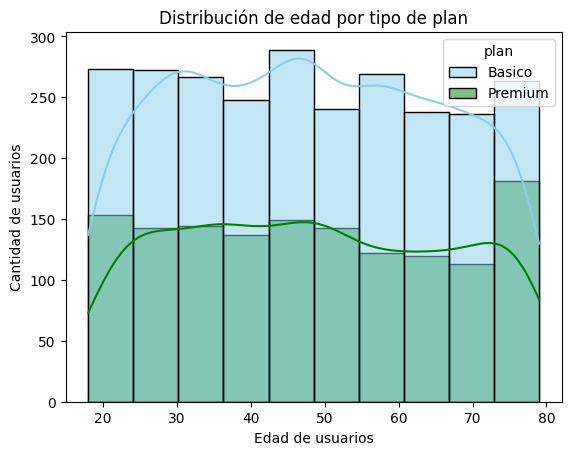

In [72]:
# Histograma para visualizar la edad (age)
sns.histplot(
    data=user_profile,
    x="age",
    bins=10,
    hue="plan",
    palette=['skyblue', 'green'],
    kde=True
)

plt.xlabel('Edad de usuarios')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de edad por tipo de plan')
plt.show()

💡Insights: 

**1.** Tendencia general 

La edad de los usuarios muestra una tendencia clara según el tipo de plan: 

• 	Plan Básico: concentra usuarios más jóvenes. 

• 	Plan Premium: agrupa usuarios de mayor edad. 

Esto indica que la edad es un factor importante en la elección del plan. 

**2.** Existe un patrón muy marcado. 

El patrón principal es un desplazamiento de las distribuciones: 

• 	La curva del plan Básico está más cargada hacia edades bajas. 

• 	La curva del plan Premium se desplaza hacia edades medias y altas. 

Este comportamiento sugiere que los usuarios más adultos tienden a preferir servicios más completos o con más beneficios. 

**3.** Tipo de distribución 

La forma de la distribución también aporta información: 

Las dos distribuciones no son simétricas y muestran sesgos opuestos, lo que refuerza la diferencia entre los perfiles de usuario de cada plan. 

La edad influye claramente en la elección del plan. Los usuarios jóvenes se inclinan por el plan Básico, mientras que los usuarios de mayor edad prefieren el plan Premium. Esto abre oportunidades para estrategias de marketing segmentadas por edad y para diseñar beneficios diferenciados según el grupo demográfico.


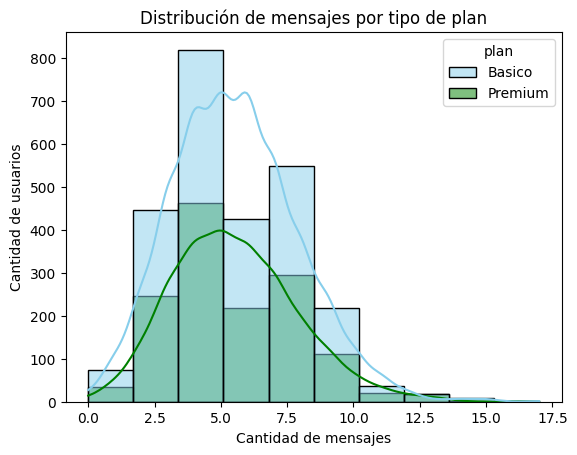

In [73]:
# Histograma para visualizar la cant_mensajes
sns.histplot(
    data=user_profile,
    x="cant_mensajes",
    bins=10,
    hue="plan",
    palette=['skyblue', 'green'],
    kde=True
)

plt.xlabel('Cantidad de mensajes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes por tipo de plan')
plt.show()


💡Insights: 

**1.** Tendencia general 

La tendencia muestra diferencias claras en el comportamiento de mensajería según el tipo de plan: 

• 	Usuarios del plan Básico: tienden a enviar pocos mensajes, concentrándose en valores bajos. 

• 	Usuarios del plan Premium: envían más mensajes en promedio, con una distribución más amplia. 

Tendencia clave: El nivel de actividad en mensajería aumenta en usuarios Premium. 

**2.** Existe un patrón muy evidente 

El gráfico revela un patrón consistente: 

• 	La distribución del plan Básico está concentrada en valores bajos, lo que indica un uso ligero. 

• 	La distribución del plan Premium está desplazada hacia la derecha, mostrando mayor actividad. 

• 	Las curvas apenas se superponen, lo que indica que el tipo de plan segmenta claramente el comportamiento. 

Patrón principal: Los usuarios Premium son más activos en mensajería que los usuarios Básico.

**3.** Tipo de distribución 

La forma de las distribuciones también aporta información importante: 

Plan Básico 

- Distribución sesgada a la derecha (right-skewed).

- Muchos usuarios envían pocos mensajes y muy pocos envían muchos.

Plan Premium 

- También sesgada a la derecha, pero con una cola más larga.

- Hay más usuarios enviando cantidades medias y altas de mensajes.

Ambas distribuciones son sesgadas a la derecha, pero la del plan Premium es más amplia y muestra mayor variabilidad. 

Los usuarios del plan Básico muestran un uso bajo y concentrado de mensajería, mientras que los usuarios Premium presentan un uso más intensivo y variado. La distribución sesgada a la derecha confirma que la mayoría de usuarios envía pocos mensajes, pero existe un grupo más activo que se concentra en el plan Premium. 

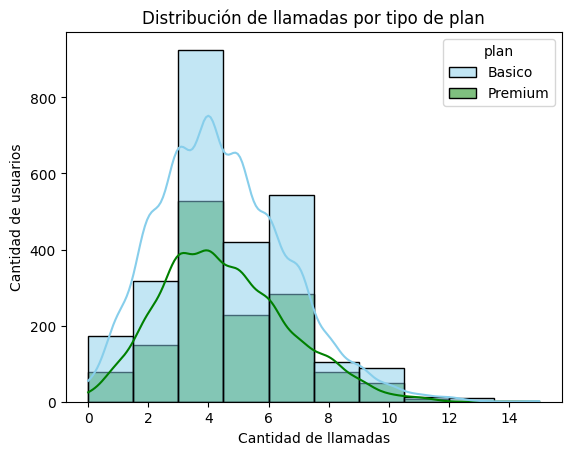

In [74]:
# Histograma para visualizar la cant_llamadas
sns.histplot(
    data=user_profile,
    x="cant_llamadas",
    bins=10,
    hue="plan",
    palette=['skyblue', 'green'],
    kde=True
)

plt.xlabel('Cantidad de llamadas')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de llamadas por tipo de plan')
plt.show()


💡Insights: 

**1.** Tendencia general 

El comportamiento de llamadas muestra una tendencia clara según el tipo de plan: 

• 	Usuarios del plan Básico: realizan menos llamadas, concentrándose en valores bajos. 

• 	Usuarios del plan Premium: realizan más llamadas en promedio, con una distribución más amplia. 

Tendencia clave: El nivel de actividad en llamadas es mayor en usuarios Premium. 

**2.** Existe un patrón muy consistente 

El gráfico revela un patrón repetido en tus análisis: 

• 	La distribución del plan Básico está muy concentrada en valores bajos, lo que indica un uso ligero. 

• 	La distribución del plan Premium está desplazada hacia la derecha, mostrando mayor actividad y variabilidad. 

• 	Las curvas apenas se superponen, lo que indica que el tipo de plan segmenta claramente el comportamiento de llamadas. 

Patrón principal: Los usuarios Premium realizan más llamadas y tienen un uso más activo del servicio.

**3.** Tipo de distribución 

La forma de las distribuciones aporta información importante: 
 
Plan Básico 

- Distribución sesgada a la derecha (right-skewed).

- Muchos usuarios hacen pocas llamadas y muy pocos hacen muchas.

Plan Premium 

- También sesgada a la derecha, pero con una cola más larga.

- Hay más usuarios realizando cantidades medias y altas de llamadas.

Ambas distribuciones son sesgadas a la derecha, pero la del plan Premium es más amplia y muestra mayor dispersión. 


Los usuarios del plan Básico muestran un uso bajo y concentrado de llamadas, mientras que los usuarios Premium presentan un uso más intensivo y variado. La distribución sesgada a la derecha confirma que la mayoría de usuarios realiza pocas llamadas, pero existe un grupo más activo que se concentra en el plan Premium. 


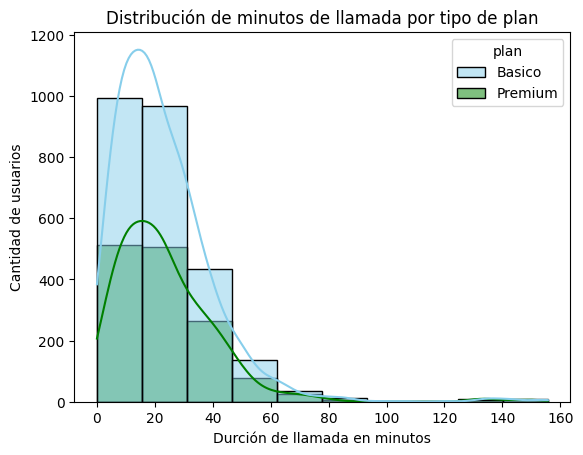

In [75]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x="cant_minutos_llamada",
    bins=10,
    hue="plan",
    palette=['skyblue', 'green'],
    kde=True
)

plt.xlabel('Durción de llamada en minutos')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de minutos de llamada por tipo de plan')
plt.show()


💡Insights: 

**1.** Tendencia general 

La tendencia muestra diferencias muy marcadas entre los dos tipos de plan: 

• 	Usuarios del plan Básico: acumulan pocos minutos de llamada, concentrándose en duraciones cortas. 

• 	Usuarios del plan Premium: acumulan más minutos, con una distribución mucho más amplia y valores más altos. 

Tendencia clave: Los usuarios Premium utilizan el servicio de llamadas de forma más prolongada e intensiva.

**2.** Existe un aptrón muy consistente 

El gráfico revela un patrón claro y repetido en tus análisis: 

• 	La distribución del plan Básico está muy concentrada en minutos bajos (0–40), lo que indica un uso limitado. 

• 	La distribución del plan Premium está desplazada hacia la derecha, mostrando mayor actividad y una cola más larga. 

• 	Las curvas apenas se superponen, lo que indica que el tipo de plan segmenta fuertemente el nivel de uso. 

Patrón principal: A mayor duración total de llamadas, mayor probabilidad de que el usuario pertenezca al plan Premium. 

**3.** Tipo de distribución 

La forma de la distribución aporta información importante: 

Plan Básico 

• 	Distribución sesgada a la derecha (right-skewed). 

• 	La mayoría de usuarios acumula pocos minutos y muy pocos acumulan muchos. 

Plan Premium 

• 	También sesgada a la derecha, pero con una cola más larga. 

• 	Hay usuarios con duraciones medias y altas que no aparecen en el plan Básico. 

Ambas distribuciones son sesgadas a la derecha, pero la del plan Premium es más amplia, más dispersa y con mayor presencia de usuarios de alto consumo. 

Los usuarios del plan Básico realizan llamadas cortas y poco frecuentes, mientras que los usuarios Premium acumulan más minutos y muestran un uso más intensivo del servicio. La distribución sesgada a la derecha confirma que la mayoría de usuarios tiene un consumo bajo, pero existe un grupo más activo que se concentra en el plan Premium. 

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

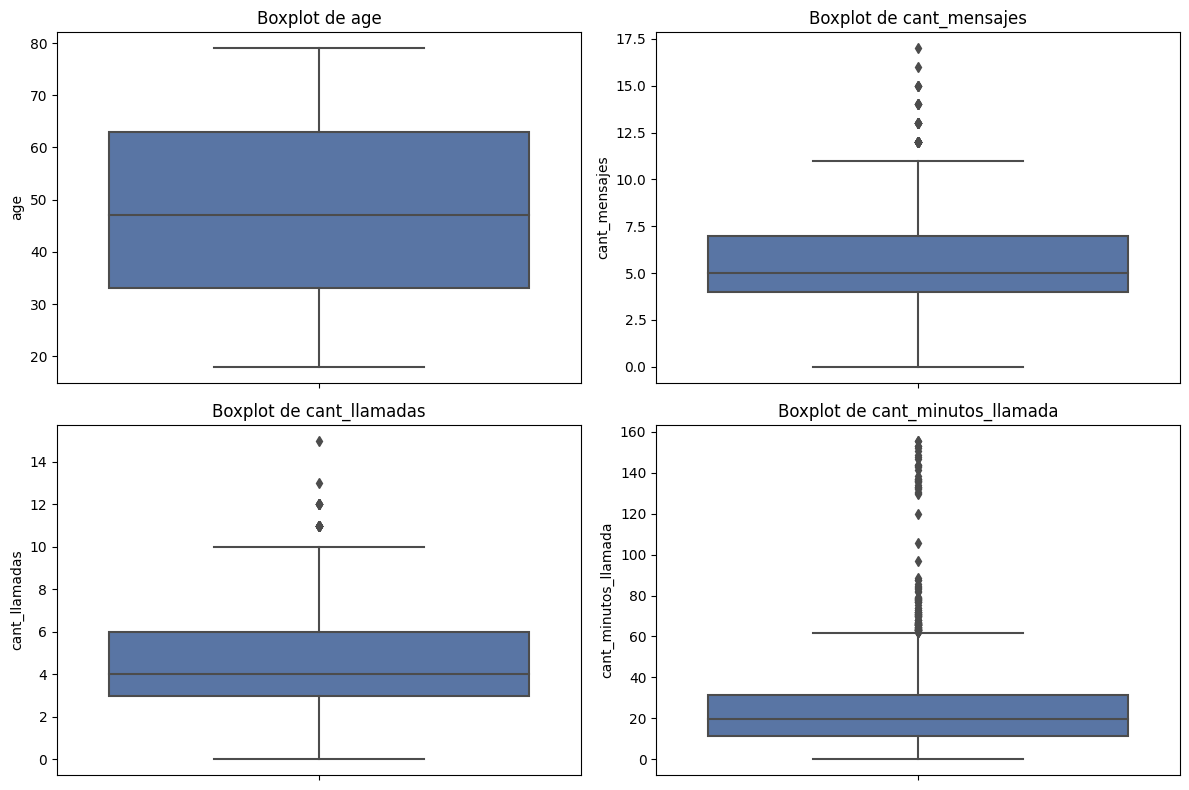

In [76]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=user_profile, y=col, color="#4C72B0")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


💡Insights: 
- **Age:** 

• No se observan valores extremos fuertes; la dispersión parece natural para una población diversa. 

• El rango intercuartílico (IQR) está centrado entre ~30 y ~60 años, lo que indica que la mayoría de los usuarios son adultos. 

• No hay outliers preocupantes; la variable es estable y representativa. No requiere limpieza. 

- **cant_mensajes:** 

• La mayoría de los usuarios envía entre 3 y 7 mensajes. 

• Hay outliers por arriba de 10 mensajes, lo que indica un pequeño grupo de usuarios con uso más intensivo. 

• La mediana está cerca de 5, lo que sugiere un comportamiento moderado. 

• Los outliers representan usuarios muy activos. No parecen errores, pero conviene revisarlos si afectan modelos sensibles. 

- **cant_llamadas:** 

• Sí hay outliers, todos en el extremo superior. 

• Representan usuarios con un uso intensivo, no necesariamente errores. 

• La variable es estable en su rango central, con una mediana clara y un IQR compacto. 

• Conviene decidir si se tratan, se mantienen o se analizan como un segmento especial. 

- **cant_minutos_llamada:**

• Sí hay outliers, y en gran cantidad. 

• La distribución es muy sesgada hacia llamadas largas. 

• La mayoría de los usuarios tiene duraciones cortas y consistentes. 

• Los outliers representan un comportamiento relevante que puede ser clave para segmentación o análisis operativo. 

In [77]:
# Calcular límites con el método IQR

columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

limites_iqr = {}

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    limites_iqr[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_limit': lower_limit,
        'upper_limit': upper_limit
    }

limites_iqr

{'age': {'Q1': 33.0,
  'Q3': 63.0,
  'IQR': 30.0,
  'lower_limit': -12.0,
  'upper_limit': 108.0},
 'cant_mensajes': {'Q1': 4.0,
  'Q3': 7.0,
  'IQR': 3.0,
  'lower_limit': -0.5,
  'upper_limit': 11.5},
 'cant_llamadas': {'Q1': 3.0,
  'Q3': 6.0,
  'IQR': 3.0,
  'lower_limit': -1.5,
  'upper_limit': 10.5},
 'cant_minutos_llamada': {'Q1': 11.12,
  'Q3': 31.415,
  'IQR': 20.295,
  'lower_limit': -19.322500000000005,
  'upper_limit': 61.8575}}

In [78]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 

**- cant_mensajes:** 

• 	El límite inferior negativo confirma que no hay outliers por abajo. 

• 	El límite superior (11.5) indica que todo usuario con más de 12 mensajes es outlier. 

• 	Esto coincide con el boxplot: pocos usuarios muy activos. 

Los outliers representan heavy users, no errores. La mayoría envía entre 4 y 7 mensajes.

**- cant_llamadas:** 

• 	No hay outliers inferiores. 

• 	Todo valor ≥ 11 llamadas es outlier. 

• 	La distribución es compacta, con pocos usuarios intensivos. 

Los outliers son pocos y representan usuarios con un patrón de llamadas mucho más alto que el promedio. 

**- cant_minutos_llamada:** 

• 	No hay outliers inferiores. 

• 	Todo valor ≥ 62 minutos es outlier. 

• 	Aquí sí hay muchos outliers, lo cual coincide con tu boxplot. 

• 	La distribución es muy sesgada a la derecha, típica de duraciones de llamada. 

Es la variable con más outliers. Los usuarios con llamadas largas son un segmento especial que puede influir fuertemente en promedios y modelos. 

**Conclusión** 

Las variables de uso (mensajes, llamadas y minutos) muestran patrones típicos de comportamiento digital: la mayoría usa el servicio de forma moderada, pero existe un grupo pequeño de usuarios intensivos que generan outliers. Estos no parecen errores, sino segmentos valiosos para análisis de comportamiento, retención o monetización.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:** 
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos 

In [79]:
# Crear columna grupo_uso
def clasificar_uso(row):
    if row["cant_llamadas"] < 5 and  row["cant_mensajes"] < 5:
        return "Bajo uso"
    elif row["cant_llamadas"] < 10 and row["cant_mensajes"] < 10:
        return "Uso medio"
    else:
        return "Alto uso"

user_profile["grupo_uso"] = user_profile.apply(clasificar_uso, axis=1)

In [80]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso



### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**. 

**Instrucciones:** 
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`. 
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos


In [81]:
# Crear columna grupo_edad
def clasificar_edad(row):
    if row["age"] < 30:
        return "Joven"
    elif row["age"] < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

user_profile["grupo_edad"] = user_profile.apply(clasificar_edad, axis=1)

In [82]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

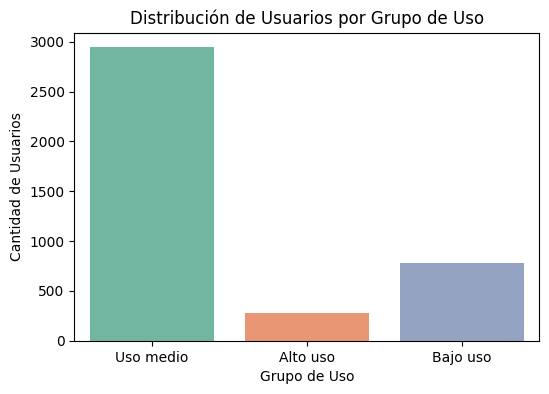

In [88]:
# Visualización de los segmentos por uso
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x="grupo_uso", palette="Set2")
plt.title("Distribución de Usuarios por Grupo de Uso")
plt.xlabel("Grupo de Uso")
plt.ylabel("Cantidad de Usuarios")
plt.show()

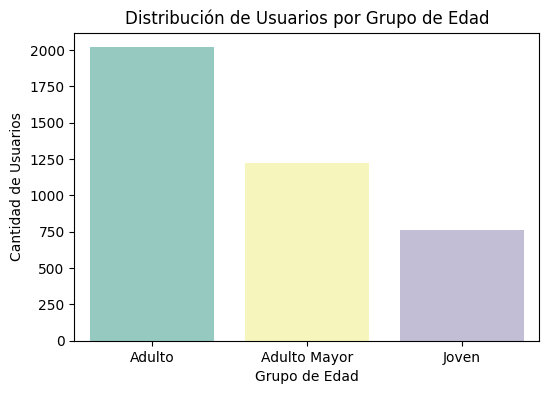

In [90]:
# Visualización de los segmentos por edad
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x="grupo_edad", palette="Set3")
plt.title("Distribución de Usuarios por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

• Se identificaron valores extremos (outliers) en las variables de uso, especialmente en **cant_minutos_llamada**, donde existe un grupo considerable de llamadas de larga duración. 

• Las variables **cant_mensajes** y **cant_llamadas** también presentan outliers, aunque en menor cantidad. Estos valores representan comportamientos intensivos, no errores. 

• No se detectaron problemas relevantes en la variable **age**, ya que sus límites IQR no generan outliers reales.

🔍 **Segmentos por Edad**

• **Jóvenes (<30 años)**: Representan un grupo con potencial de crecimiento. Suelen tener un uso moderado y estable, lo que los hace candidatos para planes accesibles o paquetes flexibles. 

• **Adultos (30–59 años)**: Constituyen el segmento más numeroso y con mayor estabilidad en patrones de uso. Son usuarios ideales para planes estándar o paquetes combinados. 

• **Adulto Mayor (60+)**: Presentan menor variabilidad en el uso, pero algunos muestran comportamientos intensivos en llamadas, lo que puede indicar necesidades específicas (soporte, comunicación familiar, servicios médicos). 

📊 **Segmentos por Nivel de Uso**

• **Bajo uso**: Usuarios con menos de 5 llamadas y 5 mensajes. Representan un segmento de bajo costo operativo, pero con oportunidades de aumentar engagement mediante promociones o paquetes básicos. 

• **Uso medio**: Usuarios con actividad constante pero moderada. Son el “core” del negocio y responden bien a planes estándar. 

• **Alto uso**: Usuarios intensivos en llamadas, mensajes o minutos. Este grupo es pequeño pero altamente valioso, ya que genera la mayor parte del tráfico y consumo. Son candidatos ideales para planes premium o ilimitados. 

➡️ Esto sugiere que:

• El comportamiento de uso no es homogéneo: existe una base amplia de usuarios moderados y un grupo pequeño pero significativo de heavy users que impulsan gran parte del consumo. 

• Los outliers no deben eliminarse, ya que representan **segmentos estratégicos** con necesidades específicas y alto valor comercial. 

• La combinación de edad + nivel de uso permite identificar perfiles claros: 

    • Jóvenes de bajo uso → planes económicos. 
    
    • Adultos de uso medio → planes estándar. 
    
    • Adultos mayores o adultos de alto uso → planes premium o ilimitados. 

💡 **Recomendaciones**

• **Crear o ajustar planes diferenciados por nivel de uso**, especialmente uno premium para heavy users que realizan llamadas largas. 

• **Diseñar campañas específicas por edad**, por ejemplo: 

    • Jóvenes: paquetes flexibles o promociones digitales. 
    
    • Adultos: planes combinados (llamadas + datos). 
    
    • Adulto mayor: planes con minutos ilimitados y soporte prioritario. 
    
• **Monitorear los outliers como segmento estratégico**, no como anomalías. Pueden representar clientes de alto valor (ARPU elevado). 

• **Optimizar la oferta** actual basándose en los patrones detectados: la mayoría usa el servicio de forma moderada, por lo que los planes estándar deben ser competitivos y atractivos. 

• **Explorar oportunidades de retención** en los segmentos de alto uso, ya que su comportamiento indica dependencia del servicio.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`

In [ ]:
https://github.com/maria-ordonezg11/telecom-analysis